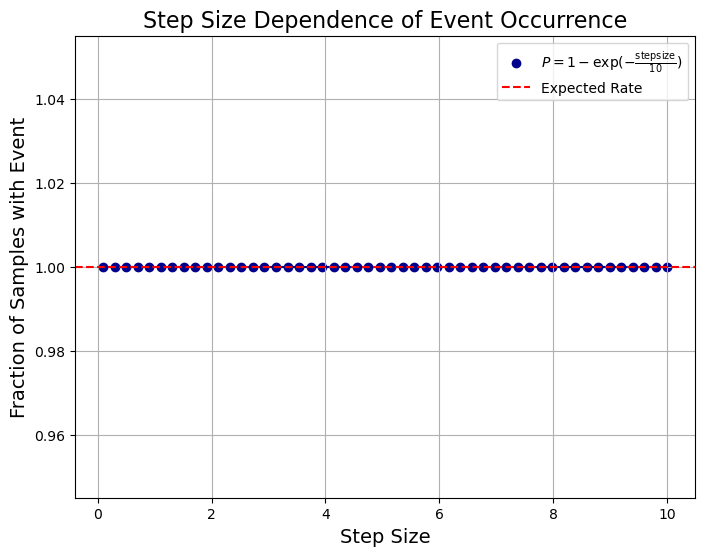

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 設定
samples = 20000  # シミュレーションサンプル数
L = 100  # 最大進行距離
step_sizes = np.linspace(0.1, 10.0, 50)  # ステップサイズの範囲
event_probability = lambda stepsize: 1 - np.exp(-stepsize / 2)  # 事象の発生確率

# シミュレーション
event_rates = []

for step_size in step_sizes:
    event_count = 0
    for _ in range(samples):
        position = 0
        while position < L:
            # 事象が発生する確率をサンプリング
            if np.random.rand() < event_probability(step_size):
                event_count += 1
                break
            position += step_size  # ステップを進める
    # 事象が1回でも発生したサンプルの割合
    event_rates.append(event_count / samples)
exp_rate = 1 - np.exp(-L / 2)  # 理論的な事象発生率
# プロット
plt.figure(figsize=(8, 6))
plt.scatter(step_sizes, event_rates, label=r'$P=1-\exp(-\frac{\mathrm{stepsize}}{10})$', color='darkblue')
plt.plot(step_sizes, event_rates,  color='darkblue')
plt.axhline(y=exp_rate, color='r', linestyle='--', label='Expected Rate')
plt.xlabel('Step Size', fontsize=14)
plt.ylabel('Fraction of Samples with Event', fontsize=14)
plt.title('Step Size Dependence of Event Occurrence', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()


calc
2.01
center = -43.806646
width = 13.287611


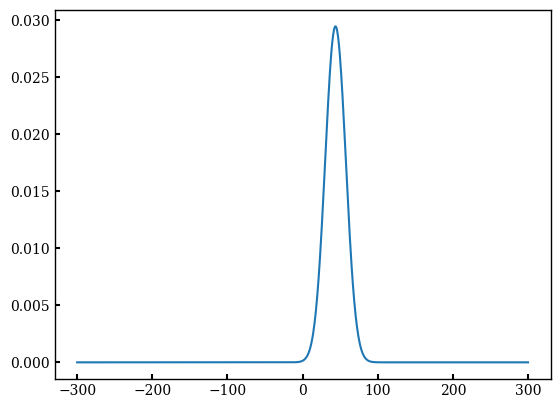

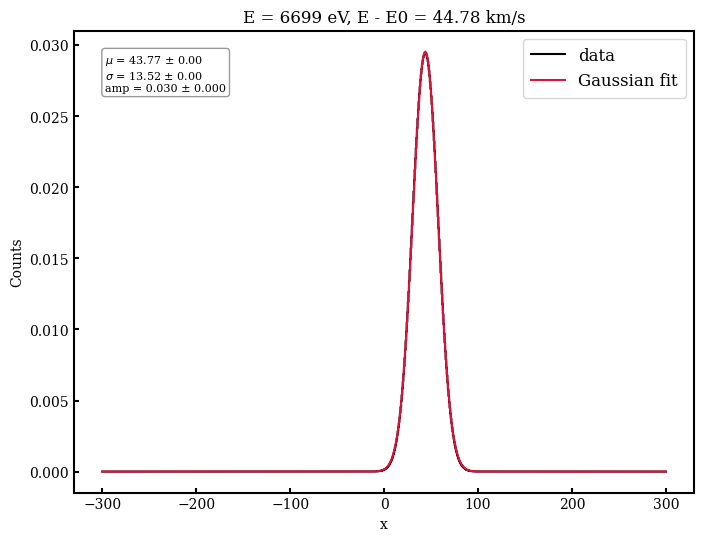

In [130]:
import matplotlib.pyplot as plt
import numpy as np
c = 3e5  # 光速 (km/s)
def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
def vgaussian(x, mu, sigma, v):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (((x*(1+v/c)) - mu) / sigma) ** 2)
def prob(tau, step=0.1):
    return 1 - np.exp(-tau*step)

E = 6699
E0 = 6700
sigma_v = 90
sigma_e = sigma_v * 6700 /  c
sigma_nat = 0.3
A = 1/sigma_v**2 + E**2/(c**2 * sigma_nat**2)
B = (E-E0)*E/(c * sigma_nat**2)
sigma_eff = np.sqrt(1/A)
v = np.linspace(-300, 300, 1000)
print("calc")
print(sigma_e)
print(f"center = {B/A:2f}")
print(f"width = {sigma_eff:2f}")
gaus1 = gaussian(v, 0, sigma_v)
gaus2 = vgaussian(E, 6700, 0.3, v)
gaus3 = gaussian(E, 6700, np.sqrt(0.3**2+sigma_e**2))
conv = gaus1 * prob(gaus2) / prob(gaus3)
norm_comv = np.trapz(conv, v)
conv /= norm_comv
# plt.plot(E, gaus1, label='Gaussian 1')
#plt.plot(v, gaus2, label='Gaussian 2')
plt.plot(v, conv, label='Convolution')
#plt.axvline(6700*(1-v/c), color='r', linestyle='--', label='Center Energy')
#plt.semilogy()
#plt.xlim(6697.5, 6700)
plt.show()
from Resonance_Scattering_Simulation import GeneralFunction
G = GeneralFunction()
G.gaussian_fitting_with_plot_xy(v, conv, title=f"E = {E} eV, E - E0 = {(6700-E)*c/6700:.2f} km/s", show_residuals=False)

2.01


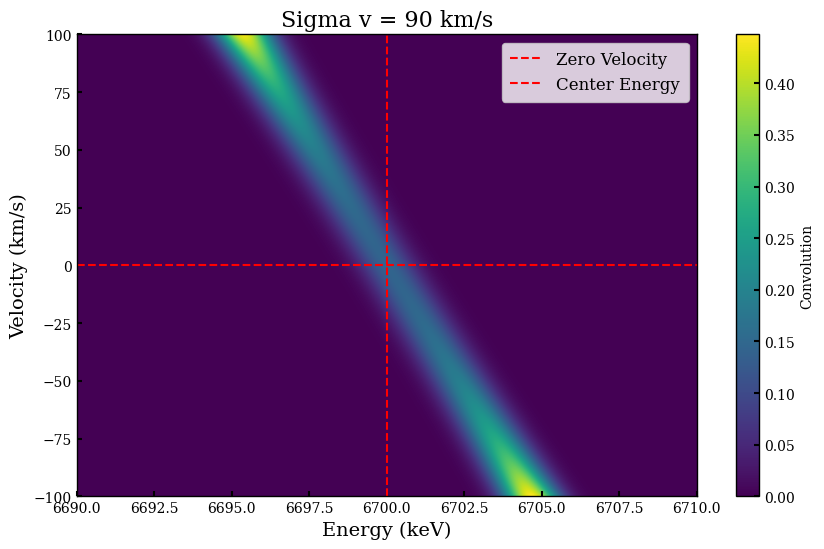

In [82]:
E = np.linspace(6695, 6705, 1000)
v = np.linspace(-100, 100, 1000)
conv_arr = []
sigma_v = 90
sigma_e = sigma_v * 6700 /  c
print(sigma_e)
for vi in v:
    gaus1 = gaussian(v, 0, sigma_v)
    gaus2 = vgaussian(E, 6700, 0.3, vi)
    gaus3 = gaussian(E, 6700, np.sqrt(0.3**2+sigma_e**2))
    conv = gaus1 * prob(gaus2) / prob(gaus3)
    norm_conv = np.trapz(conv, E)
    # conv /= norm_conv
    conv_arr.append(conv)
conv_arr = np.array(conv_arr)
eff_sig = gaussian(E, 6700, np.sqrt(2**2+0.3**2))
plt.figure(figsize=(10, 6))
plt.imshow(conv_arr/eff_sig, aspect='auto', extent=[6690, 6710, -100, 100], origin='lower', cmap='viridis')
plt.colorbar(label='Convolution')
plt.xlabel('Energy (keV)', fontsize=14)
plt.ylabel('Velocity (km/s)', fontsize=14)
plt.title(f'Sigma v = {sigma_v} km/s', fontsize=16)
plt.axhline(0, color='r', linestyle='--', label='Zero Velocity')
plt.axvline(6700, color='r', linestyle='--', label='Center Energy')
plt.legend()
plt.show()

In [ ]:
# 再実行（セッションリセット後）

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# 定数設定
sigma_nat = 0.2  # eV
sigma_v = 90     # km/s
E0 = 6700        # eV
c = 3e5          # km/s

# v軸の範囲
v = np.linspace(-200, 200, 1000)

# Eの範囲（アニメーションで動かす）
E_values = np.linspace(6697, 6701, 100)

# ガウス近似を計算する関数
def gaussian_approx(E):
    A = 1 / sigma_v**2 + E**2 / (c**2 * sigma_nat**2)
    B = E * (E - E0) / (c * sigma_nat**2)
    mu = B / A
    sigma_eff = 1 / np.sqrt(A)
    f_v = np.exp(- (v - mu)**2 / (2 * sigma_eff**2))
    f_v /= f_v.max()  # 見やすいように正規化
    return f_v, mu, sigma_eff

# プロットの準備
fig, ax = plt.subplots(figsize=(6, 4))
line, = ax.plot([], [], color='crimson')
text = ax.text(0.02, 0.95, '', transform=ax.transAxes, va='top')

ax.set_xlim(-200, 200)
ax.set_ylim(0, 1.1)
ax.set_xlabel('Ion velocity v (km/s)')
ax.set_ylabel('Relative probability')
ax.set_title('Gaussian Approximation of f(v)')

# アニメーション更新関数
def update(frame):
    E = E_values[frame]
    f_v, mu, sigma = gaussian_approx(E)
    line.set_data(v, f_v)
    text.set_text(f'E = {E:.2f} eV\nμ = {mu:.1f} km/s\nσ = {sigma:.1f} km/s')
    return line, text

anim = FuncAnimation(fig, update, frames=len(E_values), interval=100)
anim.save("/Users/keitatanaka/Dropbox/share/work/astronomy/PKS/rs_simulation/simulation_test/verification_rs_sim/gaussian_velocity_animation.gif", writer=PillowWriter(fps=10))
# 表示
plt.close(fig)
anim

